# In this notebook
I create the visuals of the data used in the model.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import rasterio as rio
import cartopy.crs as ccrs
import geopandas as gpd

In [6]:
# Import the datasources needed for each image
with rio.open('../data/durham/durham_nlcd.tif') as src:
    nlcd = src.read(1)

print(nlcd.shape)

temp = gpd.read_file('../data/durham/traversal/durham.shp')

print(temp.shape)

with rio.open('../data/durham/durham_ndvi.tif') as src:
    ndvi = src.read(1)

ndvi = np.flipud(ndvi)

print(ndvi.shape)
with rio.open('../data/durham/durham_albedo.tif') as src:
    albedo = src.read(1)
# For some reason, this is upside down...let's fix that.
albedo = np.flipud(albedo)
print(albedo.shape)

(2253, 2307)
(13877, 8)
(2253, 2307)
(2253, 2307)


# Visualize Temperature
In this visual, I want to show that the datapoints were collected along a route, and that the temperature varies along the route. This is helpful to demonstrate the raw data, and the fact that there is a trend with latitude/longitude, that needs to be corrected for in the data.

In [7]:
durham_epsg = temp.to_crs(epsg=4326)

/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


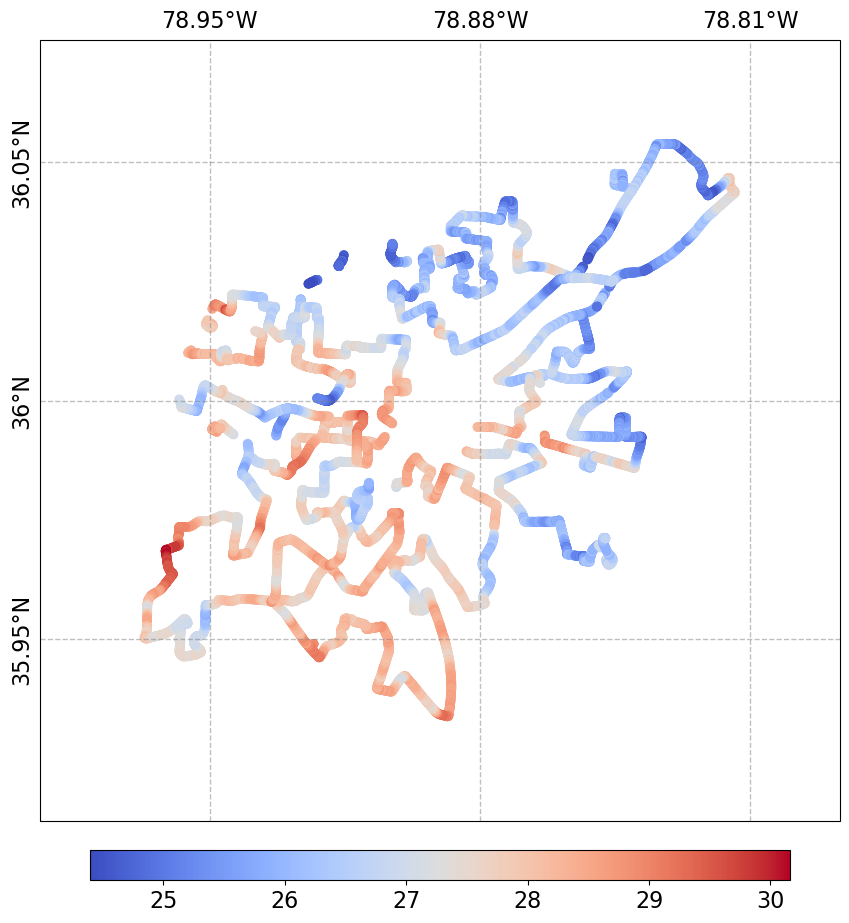

In [12]:
# First, visualize the temperature dataset
# plt.figure(figsize=(10,10))
# Import mticket
import matplotlib.ticker as mticker


base_path = '../data/durham/'
with rio.open(os.path.join(base_path, 'durham_temp.tif')) as src:
    bounds = src.bounds

fig = plt.figure(figsize=(10,10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)

# ax = plt.axes(projection=ccrs.epsg(3857))#, extent=img_extent)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-78.95, -78.88, -78.81])
gl.ylocator = mticker.FixedLocator([35.95, 36, 36.05])
# temp = temp.to_crs(epsg=4326)
ig = ax.scatter(temp.geometry.x, temp.geometry.y, c=(temp['temp_f'] - 32)*5/9,cmap='coolwarm')

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])

cbar = fig.colorbar(ig, cax=cbar_ax, orientation='horizontal')#, pad=0.05, shrink=0.8)
cbar.ax.tick_params(labelsize=16)
# cbar.ax.set_xlabel(fontsize=24)
ax.set_xlim(bounds.left, bounds.right)
ax.set_ylim(bounds.bottom, bounds.top)
# plt.xlabel('Longitude', fontsize=24)
# plt.ylabel('Latitude', fontsize=24)

# Save the figure
plt.savefig('../results/Figures/durham_temp.png', dpi=300, bbox_inches='tight')
# plt.show()g

# Visualize NLCD
Next, we want to visualize NLCD, by looking at the distinct number of categories. We want to ensure that the class numbers used in the original dataset are preserved, and then we want to ensure that the colors are somewhat sensical (e.g., more intense development should be more red).

To do this, we need to create a custom colormap that somewhat adheres to the original colormap in the NLCD dataset (https://www.mrlc.gov/data/legends/national-land-cover-database-class-legend-and-description).

In [16]:
# First, we need to copy the map so that we don't have integer values that jump too much.
new_map = nlcd.copy()
for i, n in enumerate(np.unique(nlcd)):
    new_map[nlcd == n] = i

In [17]:
# Let's create a colormap with 15 colors, to match the 15 classes in the NLCD dataset.
custom_colors = [
    "royalblue",
    "mistyrose",
    "salmon",
    "red",
    "darkred",
    "tan",
    "lawngreen",
    "darkgreen",
    "yellowgreen",
    "goldenrod",
    "lemonchiffon",
    "yellow",
    "violet",
    "lightblue",
    "cyan"
]
cmap = colors.ListedColormap(custom_colors)

/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


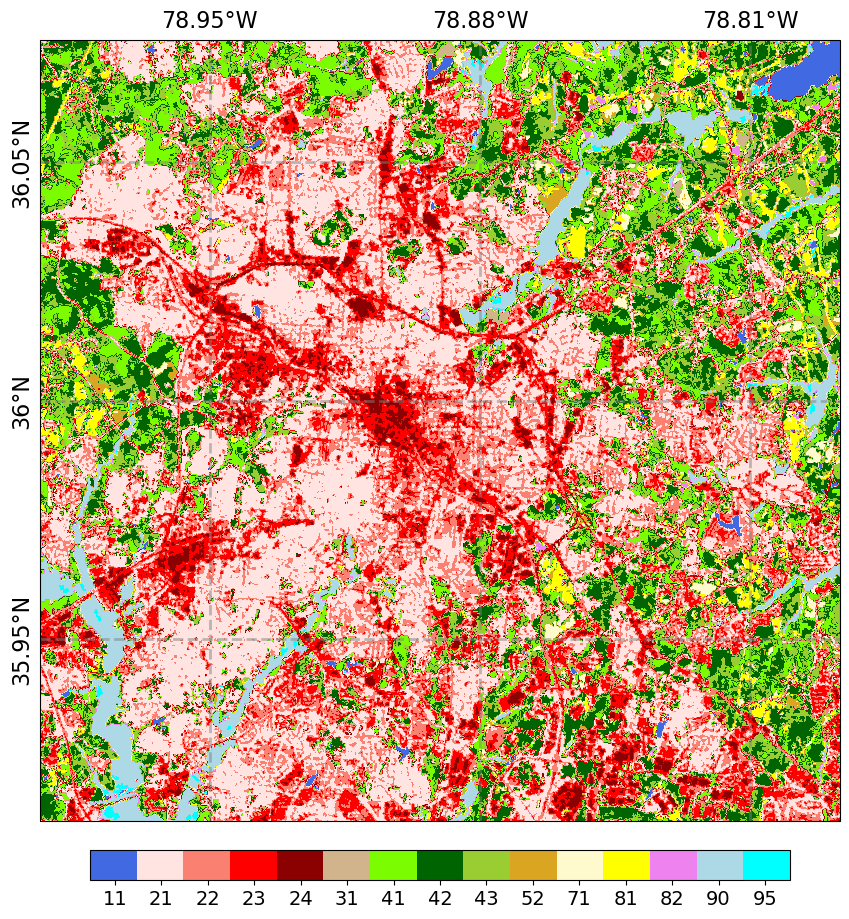

In [19]:
# Let's plot the map by copying the lat/lon information from the temperature dataset.
with rio.open(os.path.join(base_path, 'durham_temp.tif')) as src:
    bounds = src.bounds

fig = plt.figure(figsize=(10,10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-78.95, -78.88, -78.81])
gl.ylocator = mticker.FixedLocator([35.95, 36, 36.05])
img = ax.imshow(new_map, cmap=cmap, extent=img_extent)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
# This function maps the integers to the actual class names
vals = np.unique(nlcd)
def func(val, i):

    return vals[i]
cbar = fig.colorbar(img, cax=cbar_ax, ticks=np.linspace(0.5, 13.5, 15), format=func, orientation='horizontal', pad=0.05, shrink=0.8)

cbar.ax.tick_params(labelsize=14)
# cbar.ax.set_xlabel('NLCD Class', fontsize=24)

# Save the figure.
plt.savefig('../results/Figures/durham_nlcd.png', dpi=300, bbox_inches='tight')


# Visualize NDVI
This one is easy, now that we have the code for copying the lat/lon information. We just need to choose a colormap that makes sense for this data.

I choose green for the highest NDVI, and red for the lowest, since greener is supposed to indicate more greenspace.

/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


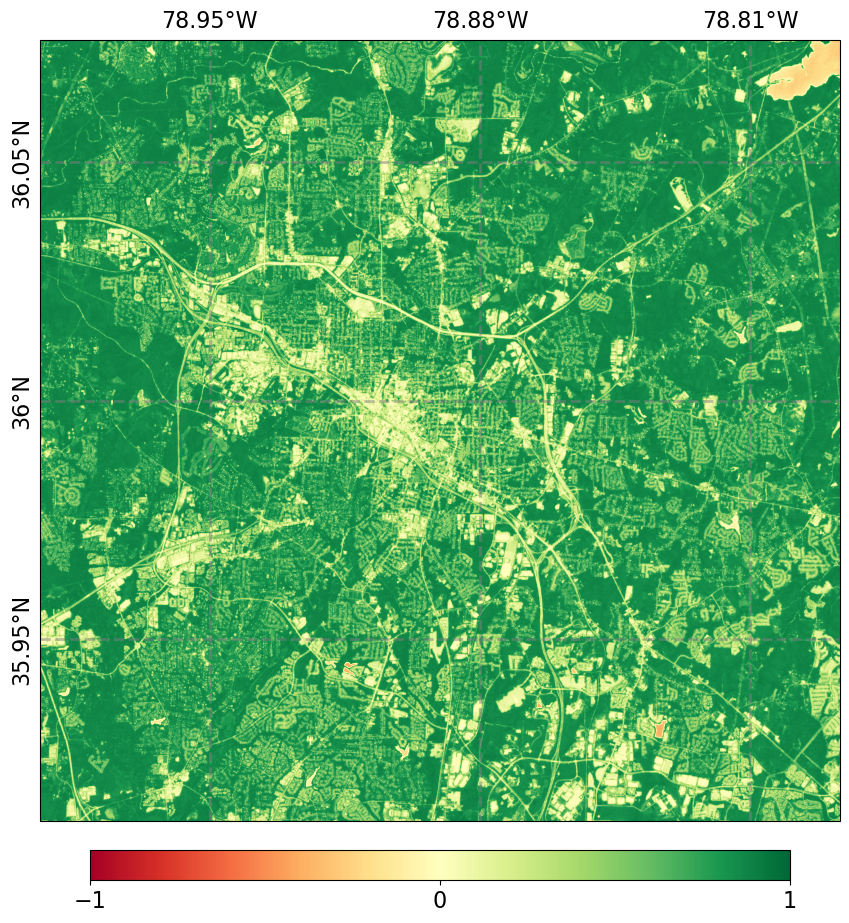

In [20]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-78.95, -78.88, -78.81])
gl.ylocator = mticker.FixedLocator([35.95, 36, 36.05])
img = ax.imshow(ndvi, cmap='RdYlGn', extent=img_extent, vmax=1, vmin=-1)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal', pad=0.05, shrink=0.8, ticks=[-1, 0, 1])

cbar.ax.tick_params(labelsize=16)
# cbar.ax.set_xlabel('NDVI', fontsize=24)
plt.savefig('../results/Figures/durham_ndvi.png', dpi=300, bbox_inches='tight')

# Visualizing Albedo
Whiter surfaces have a higher albedo, so we really want to visualize the highest points as white. Most of the image should be dark, which is perhaps not ideal for printing, but it demonstrates the point, that Albedo doesn't actually vary too much, except in a few places, where it really does!

/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


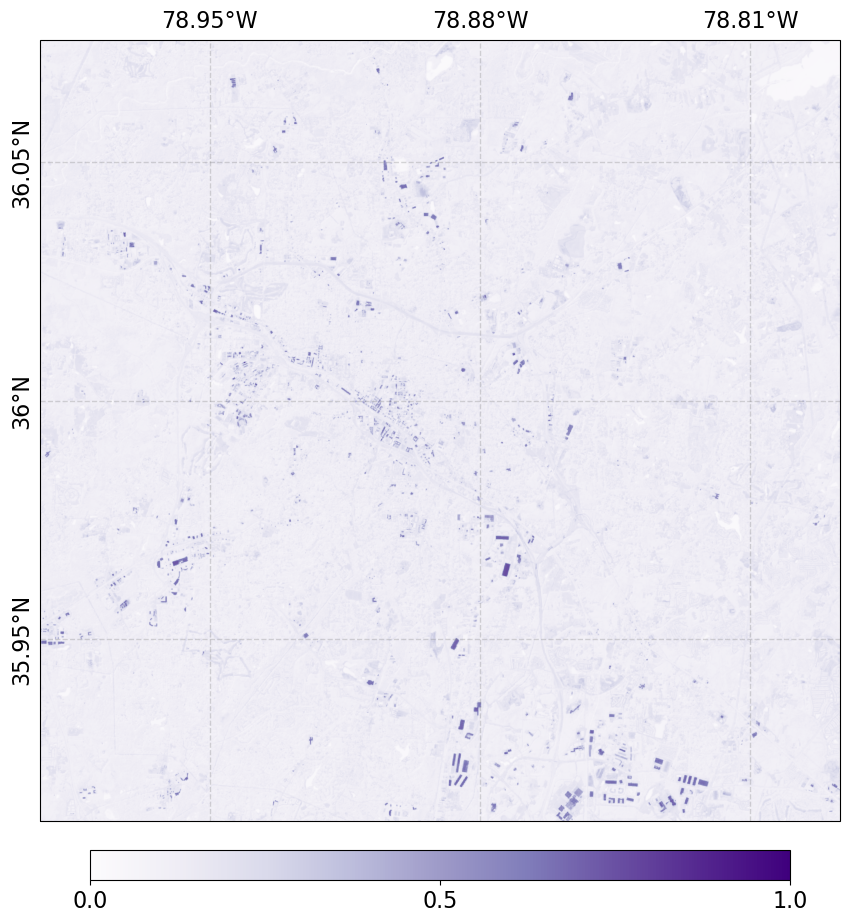

In [21]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-78.95, -78.88, -78.81])
gl.ylocator = mticker.FixedLocator([35.95, 36, 36.05])

img = ax.imshow(albedo, cmap='Purples', extent=img_extent, vmin=0, vmax=1)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal', pad=0.05, shrink=0.8, ticks=[0, 0.5, 1])

cbar.ax.tick_params(labelsize=16)
# cbar.ax.set_xlabel('Albedo', fontsize=24)


plt.savefig('../results/Figures/durham_albedo.png', dpi=300, bbox_inches='tight')
# plt.show()